# Analysis of extracted features

In [1]:
import numpy as np
import pandas as pd
import csv
from matplotlib import pyplot as plt

filenames =['usersdata.csv','relations_features.csv']

path = "/Users/jonasmuller/Local_Folder/Project NTDS/"
usersdata = path + filenames[0]
file_extracted = path + filenames[1]

In [2]:
# load
features_given = pd.read_csv(usersdata, sep = "\t", names=["userID", "gender", "timePassedValidation", "ageGroup","label"])
features_extracted = pd.read_csv(file_extracted, sep = "\t")
features_extracted = features_extracted.rename(columns = {'src':'userID'})

In [3]:
# merge dataframes
features_tot = pd.DataFrame()
features_tot = features_given[['userID','label']].set_index('userID')

features_tot = pd.merge(features_tot,features_extracted.set_index('userID'), on='userID', how='outer',sort=True)

#features_tot.head(30)

In [4]:
print(f'Number of rows: \t{features_tot.shape[0]}')
print(f'Number of NaN rows: \t{features_tot.iloc[: , 2].isna().sum()}')

Number of rows: 	5607447
Number of NaN rows: 	285487


5270494
336953


Text(0.5, 1.0, 'Histogram')

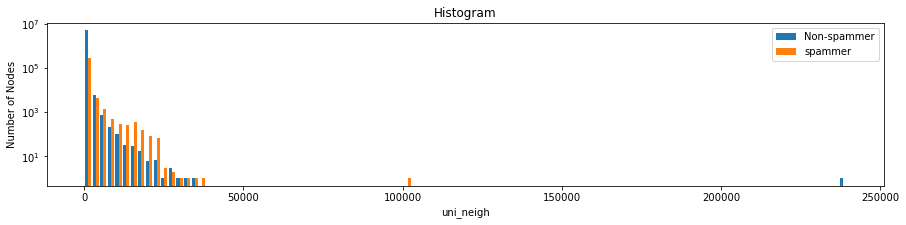

In [9]:
col = 'uni_neigh'
ax = plt.figure(2, figsize=(15, 3))
# Make a separate list for each airline
x1 = features_tot.loc[features_tot['label'] == 0][col]
x2 = features_tot.loc[features_tot['label'] == 1][col]

print(x1.shape[0])
print(x2.shape[0])

names = ['Non-spammer', 'spammer']
         
plt.hist([x1, x2], bins = 100, label=names, log=True)

# Plot formatting
plt.legend()
plt.xlabel(col)
plt.ylabel('Number of Nodes')
plt.title("Histogram")